In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# tb package tutorial: silicon nanowire

Here we compute band structure of a silicon hydrogen-passivated infinie nanowire. The nanowire width equals two crystall latices of bulk silicon. The nanowire is translated along [001] crystalographic axis of silicon.

## 1. Prerequisites

In [8]:
import tb
a_si = 5.50
PRIMITIVE_CELL = [[0, 0, a_si]]
tb.Atom.orbital_sets = {'Si': 'SiliconSP3D5S', 'H': 'HydrogenS'}

h = tb.Hamiltonian(xyz='../input_samples/SiNW.xyz', nn_distance=2.4)
h.initialize()
h.set_periodic_bc(PRIMITIVE_CELL)

## 2. Band structure computation

In [9]:
num_points = 20
kk = np.linspace(0, 3.14 / a_si, num_points, endpoint=True)
band_sructure = []

for jj in xrange(num_points):
    vals, _ = h.diagonalize_periodic_bc([0.0, 0.0, kk[jj]])
    band_sructure.append(vals)

band_sructure = np.array(band_sructure)


## 3. Visualization

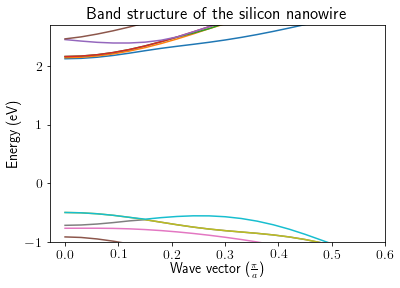

In [24]:
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif', size=14)
ax = plt.axes()
ax.set_ylim(-1.0, 2.7)
ax.set_title('Band structure of the silicon nanowire')
ax.set_xlabel(r'Wave vector ($\frac{\pi}{a}$)')
ax.set_ylabel(r'Energy (eV)')
ax.plot(kk, np.sort(np.real(band_sructure)))
plt.show()